In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

from sklearn import metrics

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
from keras.utils import np_utils,plot_model
y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
model = Sequential()
#old
# model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(10,activation = 'softmax'))

#new
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

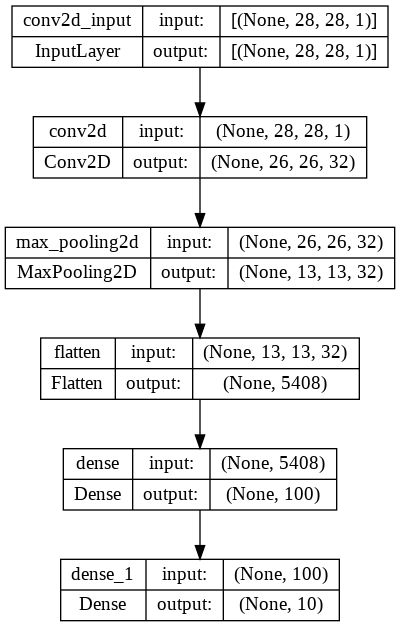

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs = 5)
# history=model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0067 - accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0026 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0017 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0013 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0010 - accuracy: 0.9937


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


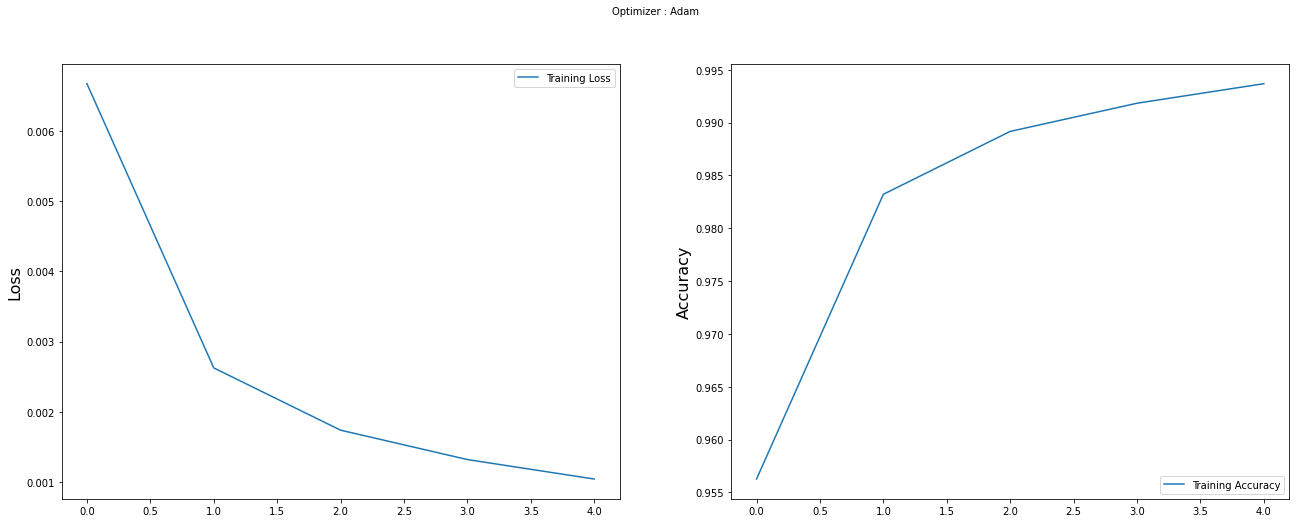

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
res=list(map(lambda x:x.argmax(),y_pred))

313/313 [==============================] - 2s 7ms/step


In [ ]:
print(list(y_test))
print(res)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
len(res)

10000

In [ ]:
(y_test != res).sum()

168

In [ ]:
print('Accuracy :',metrics.accuracy_score(y_test,res))

Accuracy : 0.9832


(28, 28)
1/1 [==============================] - 0s 19ms/step
(28, 28)
digit is 4


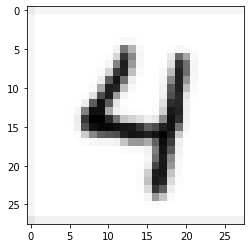

In [ ]:
import cv2
img=cv2.imread("/content/31909713-d9046856-b7ef-11e7-98fe-8a1e133c0010.png")
img=cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA) 
img = img[:,:,0]
img=img/255
plt.imshow(img,cmap='Greys')
print(img.shape)
pred = model.predict(img.reshape(1, 28,28,1))
print(img.shape)
print("digit is",pred.argmax())

(28, 28)
1/1 [==============================] - 0s 19ms/step
(28, 28)
digit is 3


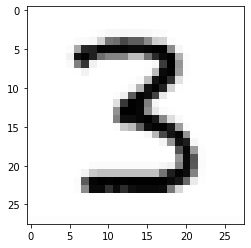

In [ ]:
import cv2
img=cv2.imread("/content/0_kKxxK1YXSyWMEBtS.png")
img=cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA) 
img = img[:,:,0]
img=img/255
plt.imshow(img,cmap='Greys')
print(img.shape)
pred = model.predict(img.reshape(1, 28,28,1))
print(img.shape)
print("digit is",pred.argmax())